# Multivariate analyses & simple phylogenetic linear regression

## Cleaning and loading data

### Loading packages

In [1]:
library("phytools")
library("convevol")
library("TreeTools")
library("nlme")
library("car")
library("factoextra")
library("ggrepel")
library("FactoMineR")
library("MASS")
library("stringr")
library("dplyr")

Le chargement a nécessité le package : ape

Le chargement a nécessité le package : maps

Le chargement a nécessité le package : MASS

Le chargement a nécessité le package : cluster


Attachement du package : ‘cluster’


L'objet suivant est masqué depuis ‘package:maps’:

    votes.repub


Le chargement a nécessité le package : geiger


Attachement du package : ‘TreeTools’


L'objet suivant est masqué depuis ‘package:phytools’:

    as.multiPhylo


Le chargement a nécessité le package : carData

Le chargement a nécessité le package : ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attachement du package : ‘dplyr’


L'objet suivant est masqué depuis ‘package:car’:

    recode


L'objet suivant est masqué depuis ‘package:nlme’:

    collapse


L'objet suivant est masqué depuis ‘package:MASS’:

    select


L'objet suivant est masqué depuis ‘package:ape’:

    where


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


### Loading data

In [2]:
phy<-read.tree(file = "data/Tree_65_sp_murids.tree")

In [3]:
multi_phy<-read.tree("data/TreeDist_murids.tree")

In [4]:
table_data<-read.table("data/Complete_Table.tsv")

## Simple phylogenetic regression

### 

In [5]:
tab_aggregated <- table_data[!duplicated(table_data$Nomenclature),][,c(1:5)]
for (i in c("TailLength", "Proxy_size_raw", "Proxy_size_GM", "RImean", "RIproxmean", "RItranmean", "RIdistmean", "RIlqmean", "TPEImean", "TPEIproxmean", "TPEItranmean", "TPEIdistmean", "TPEIlqmean")){
    temp_tab <- eval(parse(text = paste("aggregate(", i, " ~ Nomenclature, data = table_data, FUN = mean)", sep = "")))
    tab_aggregated <- cbind(tab_aggregated, temp_tab[,2])
}
colnames(tab_aggregated)[6:18] <- c("TailLength", "Proxy_size_raw", "Proxy_size_GM", "RImean", "RIproxmean", "RItranmean", "RIdistmean", "RIlqmean", "TPEImean", "TPEIproxmean", "TPEItranmean", "TPEIdistmean", "TPEIlqmean")

In [6]:
bm <- corBrownian(1, phy, form = ~Genus_species)

In [7]:
phylo_reg <- function(table, var, table_res){
    print(var)
    eval(parse(text = paste("Pgls_results <- gls(log(", var, ")~log(Proxy_size_GM), data=table, correlation=bm)", sep ="")))
    print(eval(parse(text = paste(
    "plot(log(", var, ")~log(Proxy_size_GM),data=table,cex=1.5,pch=19,bg='grey', col=c('#D2B48C','#40826D')[as.factor(table$Prehensility_lit)])
    text(log(", var, ")~log(Proxy_size_GM),data=table, labels=table$Nomenclature, cex = 0.6, pos = 1)
    abline(Pgls_results,lwd=2,col='darkgrey',lty='dashed')", sep = "")
    )))
    print(summary(Pgls_results))
    temp_table_res <- summary(Pgls_results)
    if (temp_table_res$tTable[2,4] < 0.05){
        residuals_phy_reg<- as.matrix(residuals(Pgls_results))
        colnames(residuals_phy_reg) <- paste(var, "resphy", sep = "")
        residuals_phy_reg
        return(cbind(table_res, residuals_phy_reg))
    }
    else{
        temp_col_non_res <- as.matrix(eval(parse(text = paste("table$", var, sep = ""))))
        colnames(temp_col_non_res) <- paste(var, sep = "")
        return(cbind(table_res, log(temp_col_non_res)))
    }
}

[1] "TailLength"
NULL
Generalized least squares fit by REML
  Model: log(TailLength) ~ log(Proxy_size_GM) 
  Data: table 
        AIC       BIC   logLik
  -8.786003 -2.356598 7.393001

Correlation Structure: corBrownian
 Formula: ~Genus_species 
 Parameter estimate(s):
numeric(0)

Coefficients:
                      Value  Std.Error  t-value p-value
(Intercept)        4.508859 0.15405586 29.26769       0
log(Proxy_size_GM) 0.727133 0.05995148 12.12869       0

 Correlation: 
                   (Intr)
log(Proxy_size_GM) -0.303

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.8452583 -0.1008532  0.4586146  0.7676506  1.6945367 

Residual standard error: 0.3264745 
Degrees of freedom: 65 total; 63 residual
[1] "RImean"


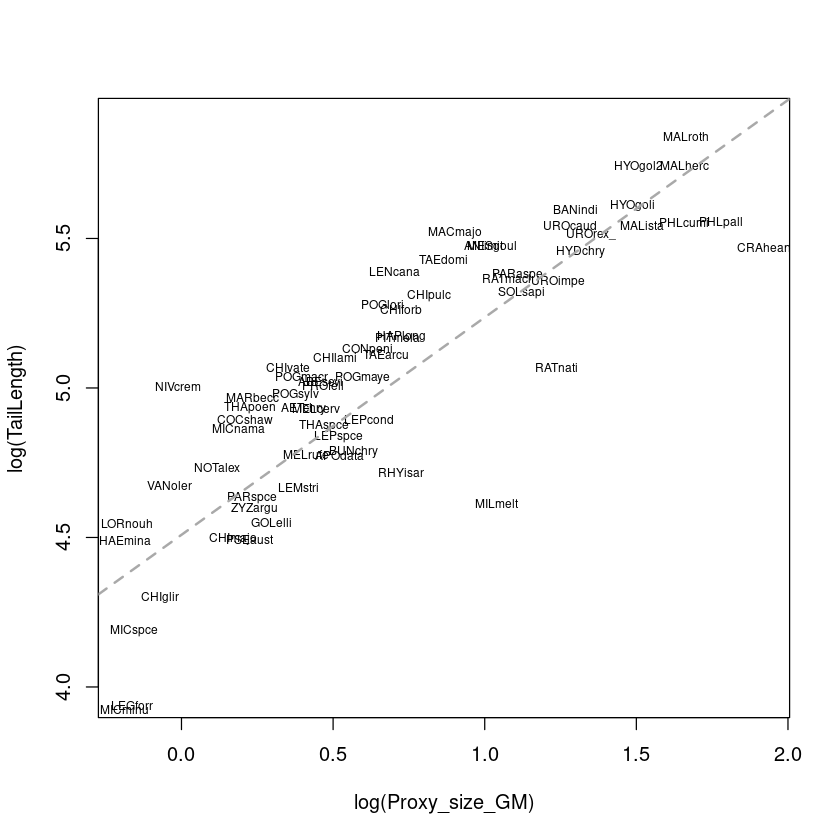

NULL
Generalized least squares fit by REML
  Model: log(RImean) ~ log(Proxy_size_GM) 
  Data: table 
        AIC       BIC  logLik
  -11.87252 -5.443116 8.93626

Correlation Structure: corBrownian
 Formula: ~Genus_species 
 Parameter estimate(s):
numeric(0)

Coefficients:
                      Value  Std.Error   t-value p-value
(Intercept)        3.373719 0.15032793 22.442399   0e+00
log(Proxy_size_GM) 0.227629 0.05850074  3.891041   2e-04

 Correlation: 
                   (Intr)
log(Proxy_size_GM) -0.303

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-0.80041546 -0.08034678  0.29794767  0.56767920  1.34235139 

Residual standard error: 0.3185743 
Degrees of freedom: 65 total; 63 residual
[1] "RIproxmean"


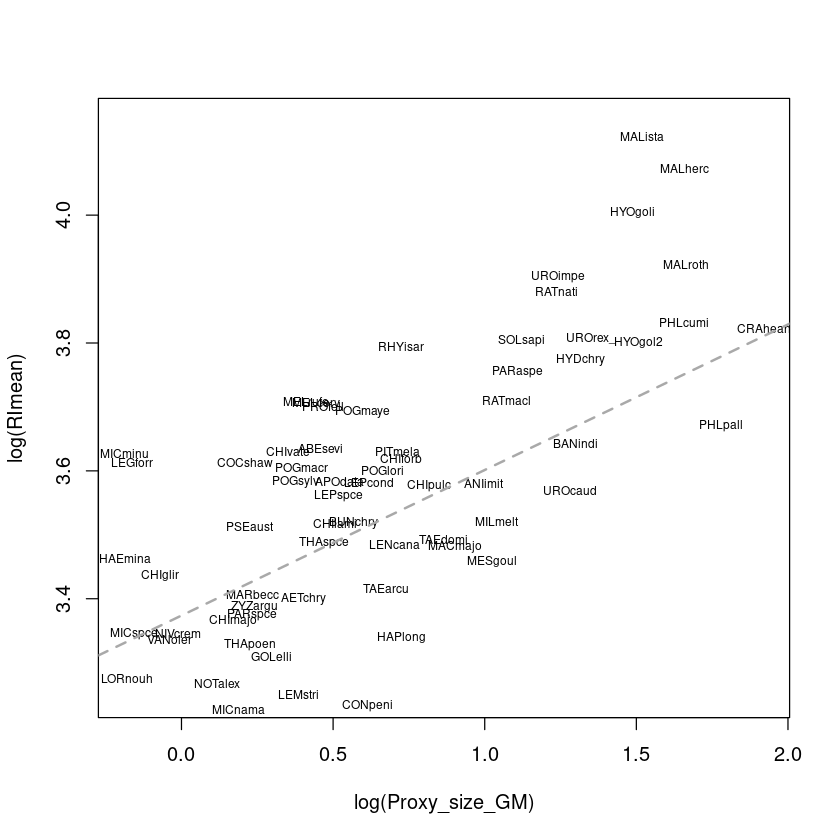

NULL
Generalized least squares fit by REML
  Model: log(RIproxmean) ~ log(Proxy_size_GM) 
  Data: table 
        AIC       BIC   logLik
  -88.73257 -82.30317 47.36629

Correlation Structure: corBrownian
 Formula: ~Genus_species 
 Parameter estimate(s):
numeric(0)

Coefficients:
                      Value  Std.Error  t-value p-value
(Intercept)        4.217441 0.08168078 51.63321   0e+00
log(Proxy_size_GM) 0.125195 0.03178641  3.93863   2e-04

 Correlation: 
                   (Intr)
log(Proxy_size_GM) -0.303

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-1.07645636 -0.02166524  0.23599715  0.54035422  1.77684785 

Residual standard error: 0.1730976 
Degrees of freedom: 65 total; 63 residual
[1] "RItranmean"


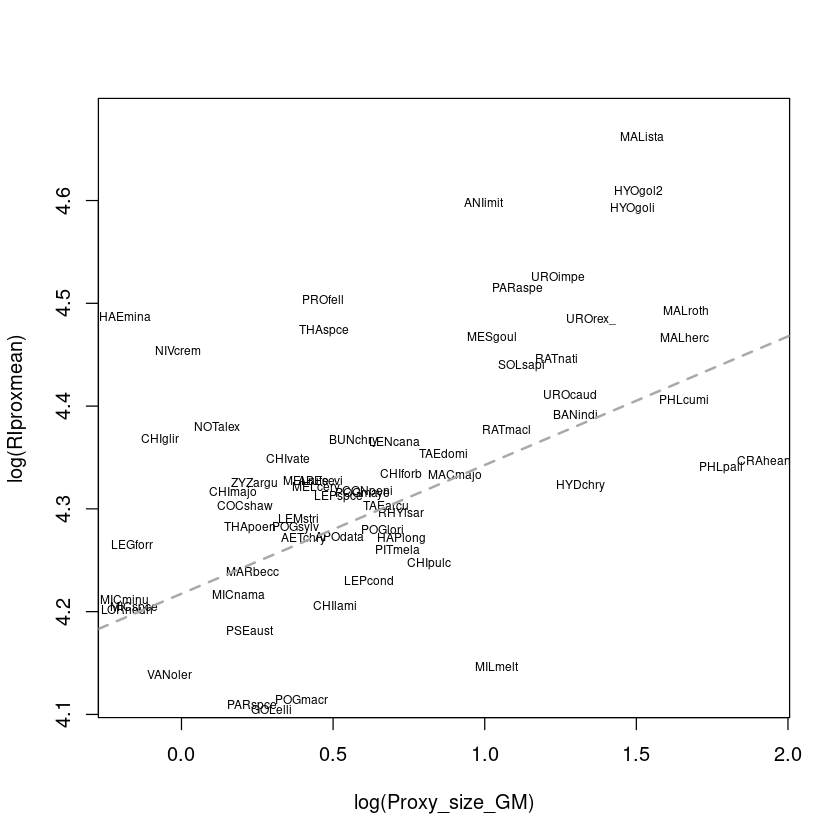

NULL
Generalized least squares fit by REML
  Model: log(RItranmean) ~ log(Proxy_size_GM) 
  Data: table 
        AIC       BIC   logLik
  -43.41814 -36.98874 24.70907

Correlation Structure: corBrownian
 Formula: ~Genus_species 
 Parameter estimate(s):
numeric(0)

Coefficients:
                      Value  Std.Error   t-value p-value
(Intercept)        3.371559 0.11703313 28.808585       0
log(Proxy_size_GM) 0.292633 0.04554393  6.425283       0

 Correlation: 
                   (Intr)
log(Proxy_size_GM) -0.303

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.0166593 -0.1723339  0.3109734  0.8481546  1.4581716 

Residual standard error: 0.2480161 
Degrees of freedom: 65 total; 63 residual
[1] "RIdistmean"


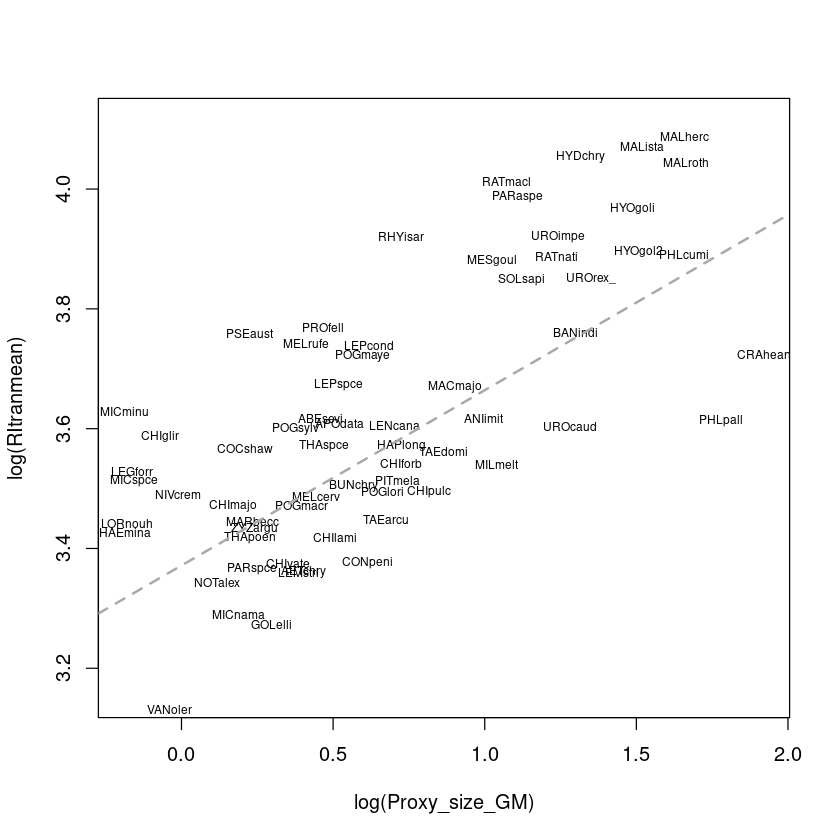

NULL
Generalized least squares fit by REML
  Model: log(RIdistmean) ~ log(Proxy_size_GM) 
  Data: table 
       AIC      BIC    logLik
  46.35989 52.78929 -20.17994

Correlation Structure: corBrownian
 Formula: ~Genus_species 
 Parameter estimate(s):
numeric(0)

Coefficients:
                       Value  Std.Error   t-value p-value
(Intercept)        3.1097097 0.23864595 13.030641  0.0000
log(Proxy_size_GM) 0.2230975 0.09287006  2.402255  0.0193

 Correlation: 
                   (Intr)
log(Proxy_size_GM) -0.303

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-0.9739640 -0.0858374  0.2490161  0.6025487  1.1663080 

Residual standard error: 0.5057375 
Degrees of freedom: 65 total; 63 residual
[1] "RIlqmean"


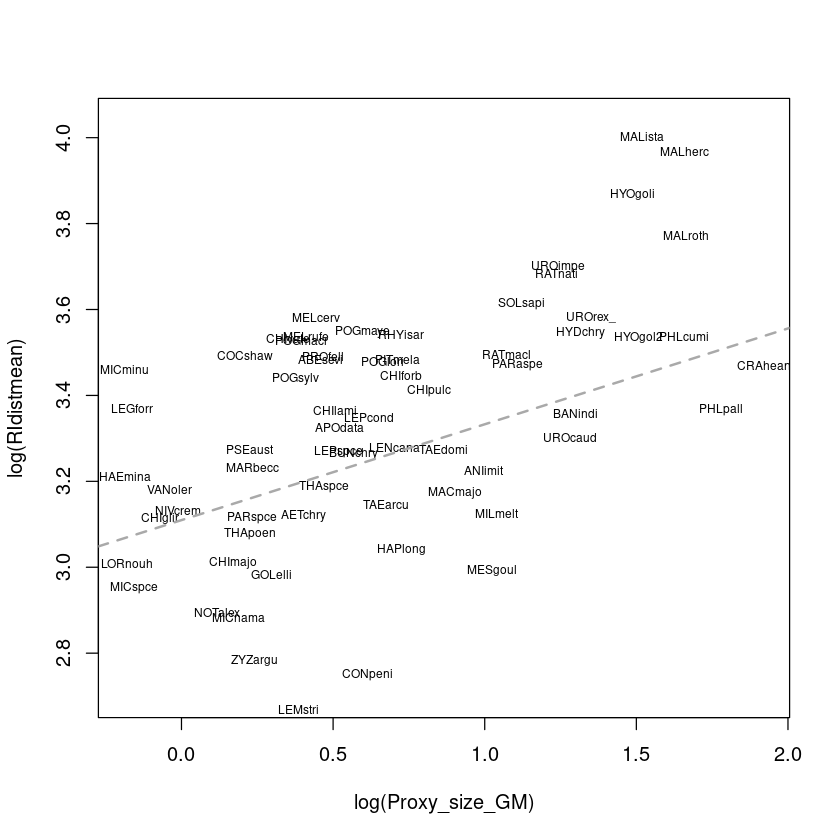

NULL
Generalized least squares fit by REML
  Model: log(RIlqmean) ~ log(Proxy_size_GM) 
  Data: table 
       AIC      BIC    logLik
  132.7181 139.1475 -63.35904

Correlation Structure: corBrownian
 Formula: ~Genus_species 
 Parameter estimate(s):
numeric(0)

Coefficients:
                       Value Std.Error   t-value p-value
(Intercept)         3.434225 0.4736002  7.251316  0.0000
log(Proxy_size_GM) -0.002175 0.1843035 -0.011799  0.9906

 Correlation: 
                   (Intr)
log(Proxy_size_GM) -0.303

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-0.94452471  0.02019666  0.33037330  0.55359464  1.06675330 

Residual standard error: 1.003652 
Degrees of freedom: 65 total; 63 residual
[1] "TPEImean"


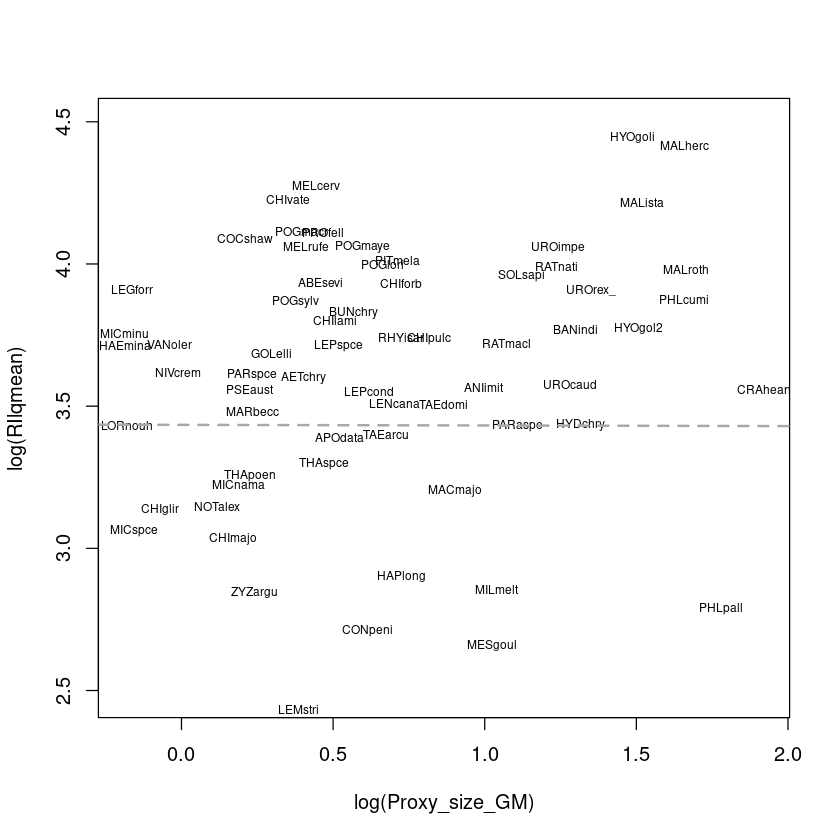

NULL
Generalized least squares fit by REML
  Model: log(TPEImean) ~ log(Proxy_size_GM) 
  Data: table 
        AIC       BIC   logLik
  -23.49124 -17.06183 14.74562

Correlation Structure: corBrownian
 Formula: ~Genus_species 
 Parameter estimate(s):
numeric(0)

Coefficients:
                      Value  Std.Error   t-value p-value
(Intercept)        4.055722 0.13708581 29.585283       0
log(Proxy_size_GM) 0.249309 0.05334751  4.673311       0

 Correlation: 
                   (Intr)
log(Proxy_size_GM) -0.303

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.0928105 -0.2679358  0.1216033  0.3785241  0.9125766 

Residual standard error: 0.2905117 
Degrees of freedom: 65 total; 63 residual
[1] "TPEIproxmean"


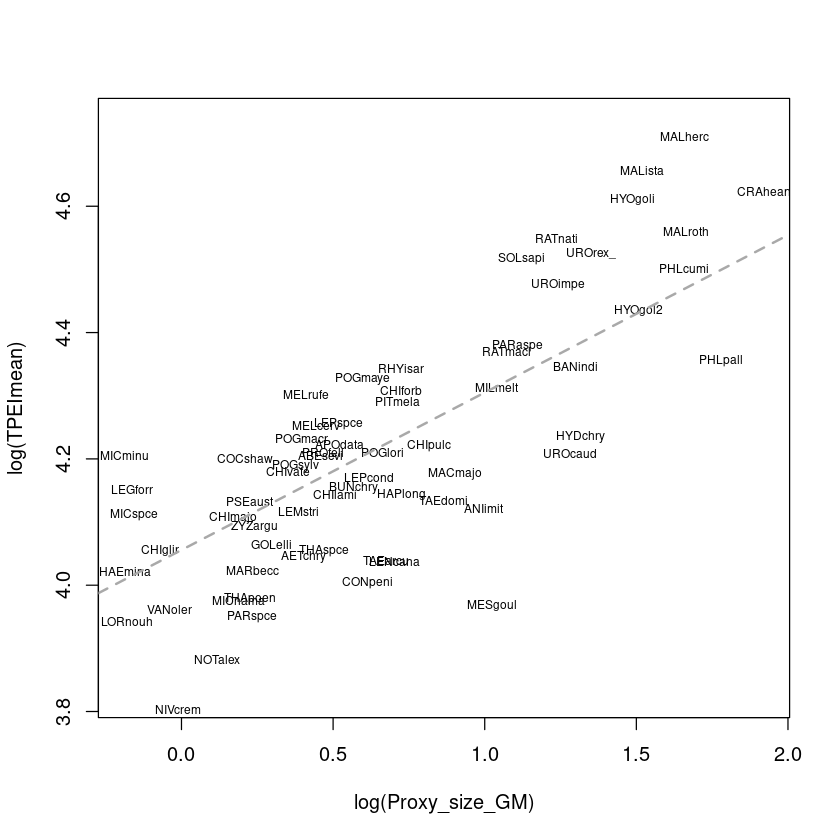

NULL
Generalized least squares fit by REML
  Model: log(TPEIproxmean) ~ log(Proxy_size_GM) 
  Data: table 
       AIC      BIC  logLik
  -88.8882 -82.4588 47.4441

Correlation Structure: corBrownian
 Formula: ~Genus_species 
 Parameter estimate(s):
numeric(0)

Coefficients:
                      Value  Std.Error  t-value p-value
(Intercept)        5.249777 0.08157995 64.35131  0.0000
log(Proxy_size_GM) 0.103399 0.03174718  3.25696  0.0018

 Correlation: 
                   (Intr)
log(Proxy_size_GM) -0.303

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-1.27305737 -0.04944613  0.28395578  0.62917609  1.30345815 

Residual standard error: 0.1728839 
Degrees of freedom: 65 total; 63 residual
[1] "TPEItranmean"


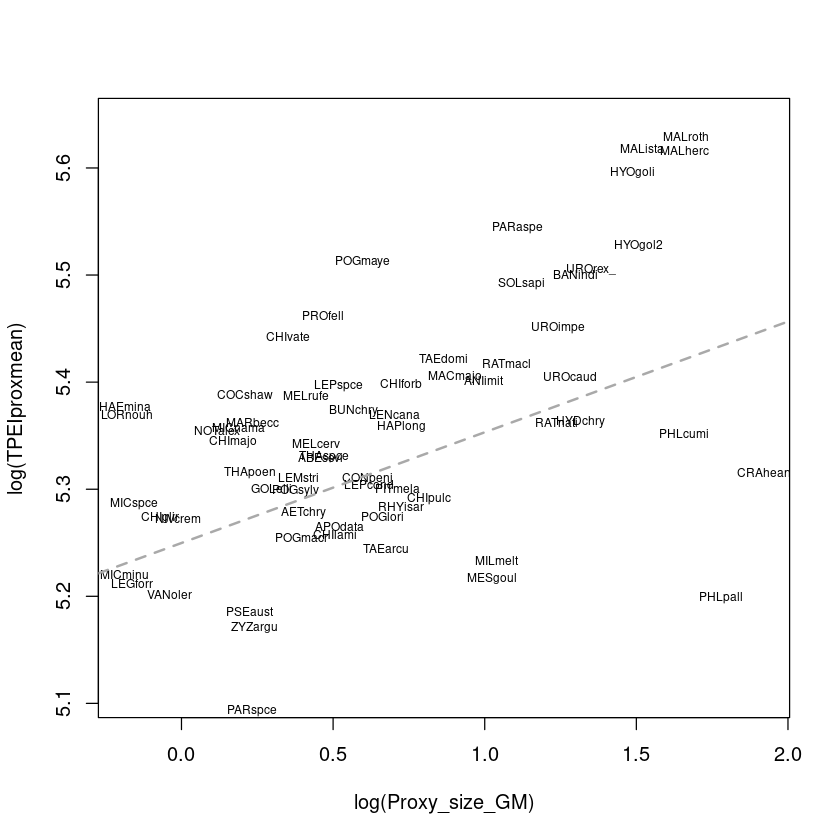

NULL
Generalized least squares fit by REML
  Model: log(TPEItranmean) ~ log(Proxy_size_GM) 
  Data: table 
        AIC       BIC   logLik
  -15.36825 -8.938842 10.68412

Correlation Structure: corBrownian
 Formula: ~Genus_species 
 Parameter estimate(s):
numeric(0)

Coefficients:
                      Value  Std.Error   t-value p-value
(Intercept)        4.028116 0.14621458 27.549346       0
log(Proxy_size_GM) 0.305145 0.05690001  5.362836       0

 Correlation: 
                   (Intr)
log(Proxy_size_GM) -0.303

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-0.68210674 -0.22776052  0.01882397  0.32890767  0.86214430 

Residual standard error: 0.3098573 
Degrees of freedom: 65 total; 63 residual
[1] "TPEIdistmean"


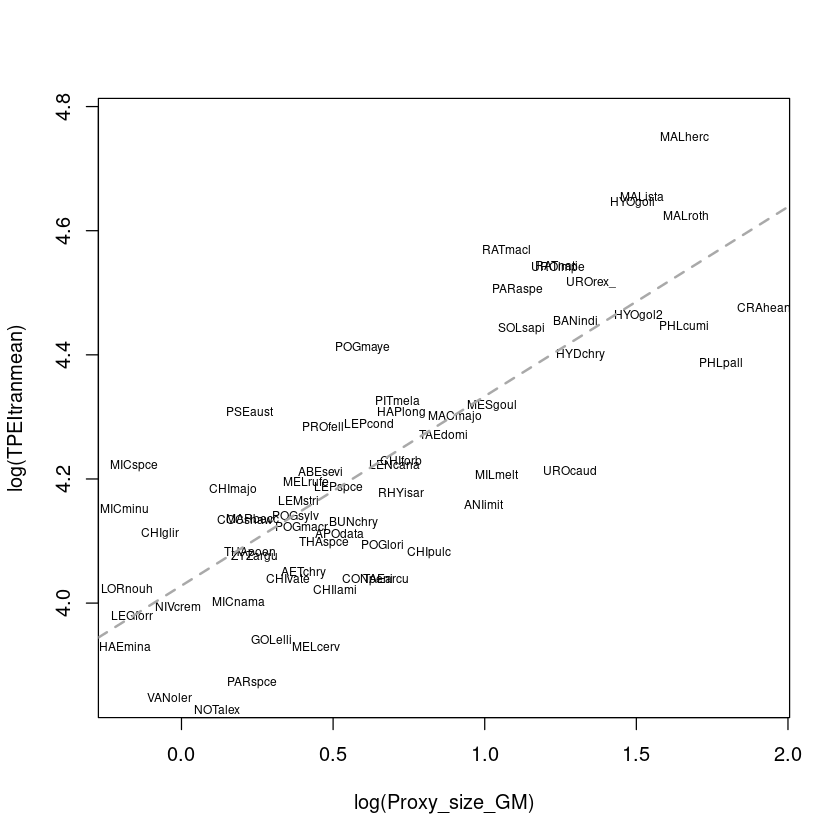

NULL
Generalized least squares fit by REML
  Model: log(TPEIdistmean) ~ log(Proxy_size_GM) 
  Data: table 
       AIC      BIC    logLik
  24.24026 30.66966 -9.120129

Correlation Structure: corBrownian
 Formula: ~Genus_species 
 Parameter estimate(s):
numeric(0)

Coefficients:
                      Value  Std.Error   t-value p-value
(Intercept)        3.569340 0.20022234 17.826883   0.000
log(Proxy_size_GM) 0.268458 0.07791735  3.445414   0.001

 Correlation: 
                   (Intr)
log(Proxy_size_GM) -0.303

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.0918566 -0.2774224  0.1180623  0.5172993  1.0066840 

Residual standard error: 0.4243103 
Degrees of freedom: 65 total; 63 residual
[1] "TPEIlqmean"


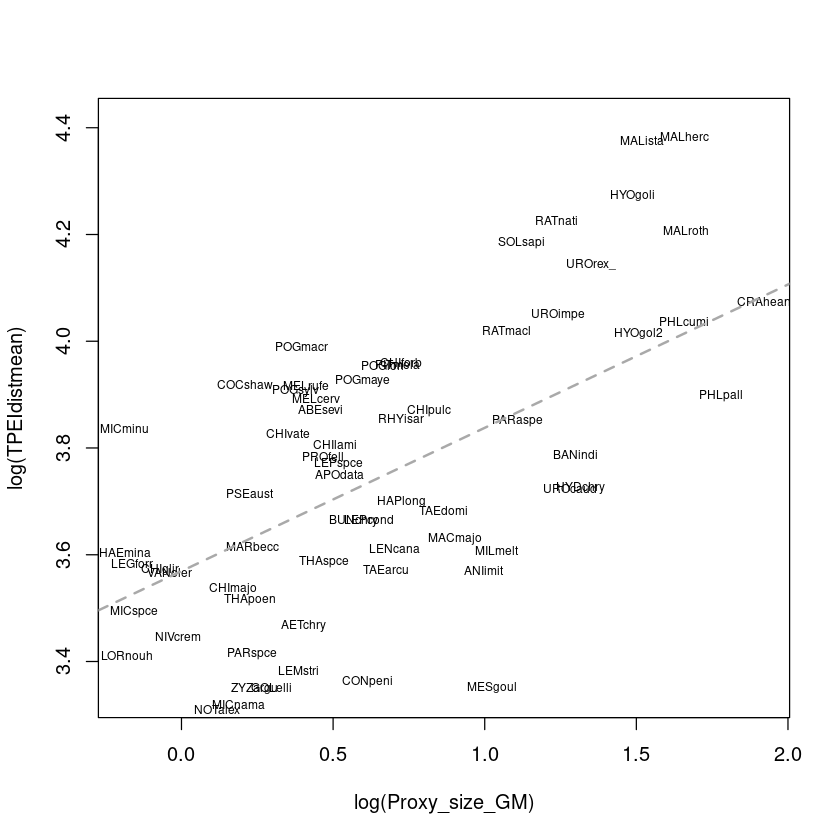

NULL
Generalized least squares fit by REML
  Model: log(TPEIlqmean) ~ log(Proxy_size_GM) 
  Data: table 
       AIC      BIC    logLik
  116.0392 122.4686 -55.01958

Correlation Structure: corBrownian
 Formula: ~Genus_species 
 Parameter estimate(s):
numeric(0)

Coefficients:
                      Value Std.Error  t-value p-value
(Intercept)        3.669026 0.4148807 8.843567  0.0000
log(Proxy_size_GM) 0.109909 0.1614526 0.680753  0.4985

 Correlation: 
                   (Intr)
log(Proxy_size_GM) -0.303

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-0.8623741 -0.1509423  0.2075709  0.4896910  0.9491137 

Residual standard error: 0.8792135 
Degrees of freedom: 65 total; 63 residual


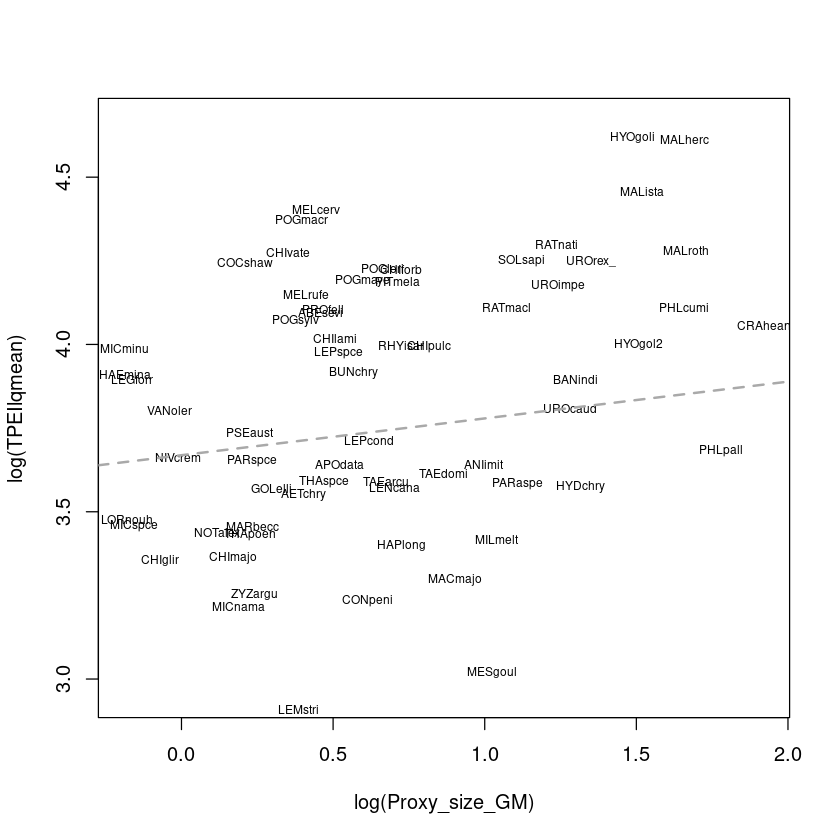

In [8]:
table_res <- table_data[,c(1:6)]
for (i in c("TailLength", "RImean", "RIproxmean", "RItranmean", "RIdistmean", "RIlqmean", "TPEImean", "TPEIproxmean", "TPEItranmean", "TPEIdistmean", "TPEIlqmean")){
    table_res <- phylo_reg(table = table_data, var = i, table_res = table_res)
}

### Testing for normality

In [9]:
for(i in 7:17){
    res_test<-shapiro.test(table_res[,i])
    if(res_test$p < 0.05){
        print(colnames(table_res)[i])
    }
}

[1] "TailLengthresphy"


## Principal Component Analysis

### All Vertebrae

In [10]:
DF_PCA_all <- table_res[,c(6, 7, 9, 10, 11, 14, 15, 16)]
rownames(DF_PCA_all) <- table_res$Genus_species
PCA_all <- PCA(DF_PCA_all)
fviz_pca_var(PCA_all, axes = c(1, 2), label="all")
fviz_pca_ind(PCA_all, axes = c(1, 2), label="all", habillage=as.factor(table_res$Prehensility), addEllipses = TRUE)

In [11]:
dataset_all <-data.frame(size=table_data$Proxy_size_GM, PC1=PCA_all$ind$coord[,1],PC2=PCA_all$ind$coord[,2],PC3=PCA_all$ind$coord[,3])
size<-dataset_all$size
cores<-c("#D2B48C","#40826D")
PC_all12 <- ggplot(dataset_all) + geom_point(aes(x=PC1,y=PC2,color=table_data$Prehensility,size=size,shape=table_res$Climbing)) + scale_color_manual(values=cores,aesthetics = c("colour","fill")) + theme(text = element_text(size=15), legend.title = element_text(colour="black", size=15, face = "bold"),legend.background = element_rect(fill="lightgray",size=0.5, linetype = "solid", colour = "darkgray")) + scale_x_continuous(name = paste("PC1 (", round(PCA(DF_PCA_all)$eig[1,2], 1), "%)", sep = "")) + scale_y_continuous(name = paste("PC2 (", round(PCA(DF_PCA_all)$eig[2,2], 1), "%)", sep = "")) + geom_text_repel(aes(x=PC1,y=PC2,label=table_res$Nomenclature),size=2)
PC_all13 <- ggplot(dataset_all) + geom_point(aes(x=PC1,y=PC3,color=table_data$Prehensility,size=size,shape=table_res$Climbing))  + scale_color_manual(values=cores,aesthetics = c("colour","fill")) + theme(text = element_text(size=15), legend.title = element_text(colour="black", size=15, face = "bold"),legend.background = element_rect(fill="lightgray",size=0.5, linetype = "solid", colour = "darkgray")) + scale_x_continuous(name = paste("PC1 (", round(PCA(DF_PCA_all)$eig[1,2], 1), "%)", sep = "")) + scale_y_continuous(name = paste("PC3 (", round(PCA(DF_PCA_all)$eig[3,2], 1), "%)", sep = "")) + geom_text_repel(aes(x=PC1,y=PC3,label=table_res$Nomenclature),size=2)

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


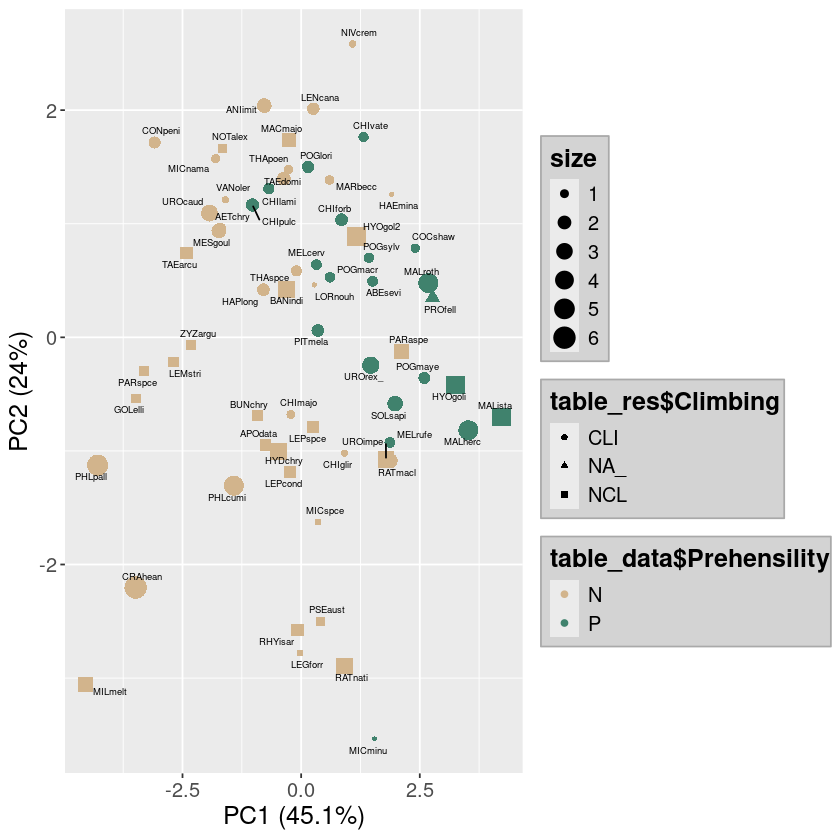

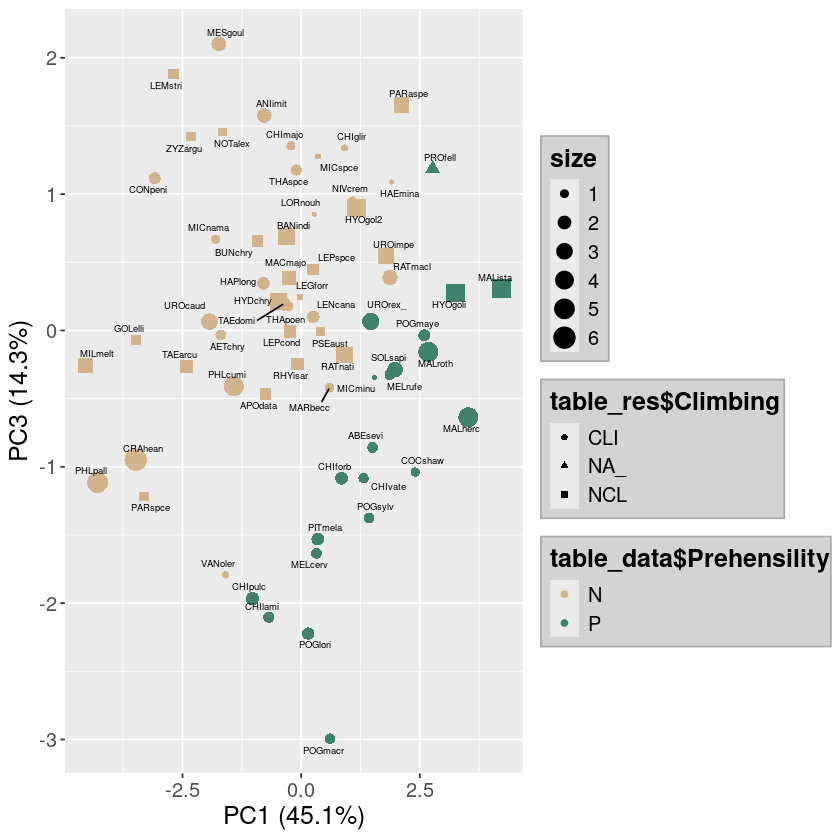

In [12]:
PC_all12
PC_all13

### Distal Vertebrae

In [13]:
DF_PCA_distal <- table_res[,c(6, 7, 11, 16)]
rownames(DF_PCA_distal) <- table_res$Genus_species
PCA_distal <- PCA(DF_PCA_distal)
fviz_pca_var(PCA_distal, axes = c(1, 2), label="distal")
fviz_pca_ind(PCA_distal, axes = c(1, 2), label="distal", habillage=as.factor(table_res$Prehensility), addEllipses = TRUE)

In [14]:
dataset_distal <-data.frame(size=table_data$Proxy_size_GM, PC1=PCA_distal$ind$coord[,1],PC2=PCA_distal$ind$coord[,2],PC3=PCA_distal$ind$coord[,3])
size<-dataset_distal$size
cores<-c("#D2B48C","#40826D")
PC_distal12 <- ggplot(dataset_distal) + geom_point(aes(x=PC1,y=PC2,color=table_data$Prehensility,size=size,shape=table_res$Climbing)) + scale_color_manual(values=cores,aesthetics = c("colour","fill")) + theme(text = element_text(size=15), legend.title = element_text(colour="black", size=15, face = "bold"),legend.background = element_rect(fill="lightgray",size=0.5, linetype = "solid", colour = "darkgray")) + scale_x_continuous(name = paste("PC1 (", round(PCA(DF_PCA_distal)$eig[1,2], 1), "%)", sep = "")) + scale_y_continuous(name = paste("PC2 (", round(PCA(DF_PCA_distal)$eig[2,2], 1), "%)", sep = "")) + geom_text_repel(aes(x=PC1,y=PC2,label=table_res$Nomenclature),size=2)
PC_distal13 <- ggplot(dataset_distal) + geom_point(aes(x=PC1,y=PC3,color=table_data$Prehensility,size=size,shape=table_res$Climbing))  + scale_color_manual(values=cores,aesthetics = c("colour","fill")) + theme(text = element_text(size=15), legend.title = element_text(colour="black", size=15, face = "bold"),legend.background = element_rect(fill="lightgray",size=0.5, linetype = "solid", colour = "darkgray")) + scale_x_continuous(name = paste("PC1 (", round(PCA(DF_PCA_distal)$eig[1,2], 1), "%)", sep = "")) + scale_y_continuous(name = paste("PC3 (", round(PCA(DF_PCA_distal)$eig[3,2], 1), "%)", sep = "")) + geom_text_repel(aes(x=PC1,y=PC3,label=table_res$Nomenclature),size=2)

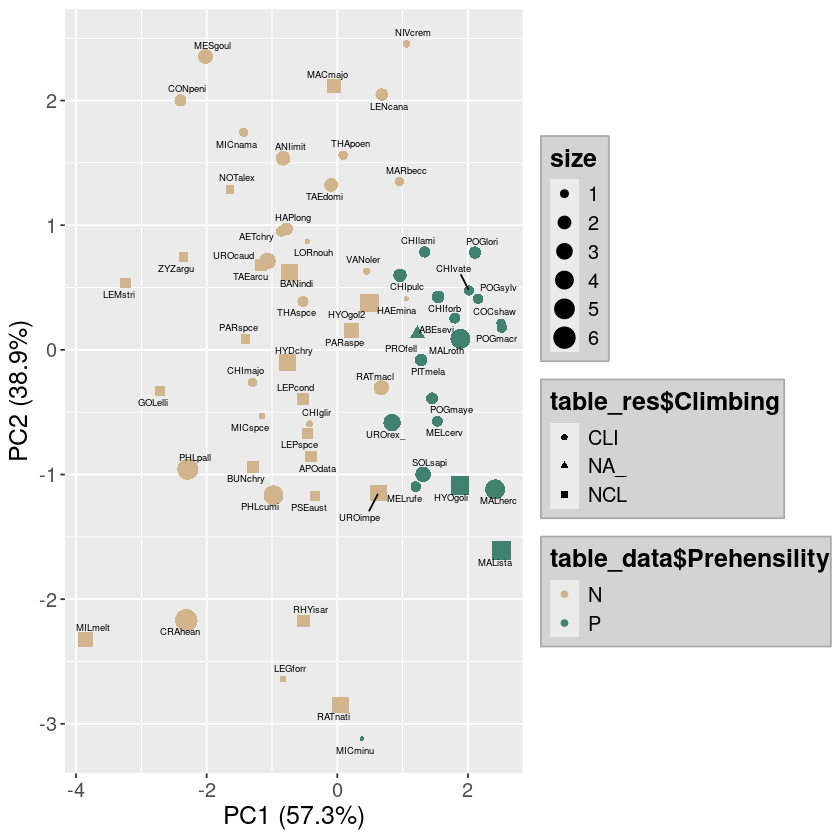

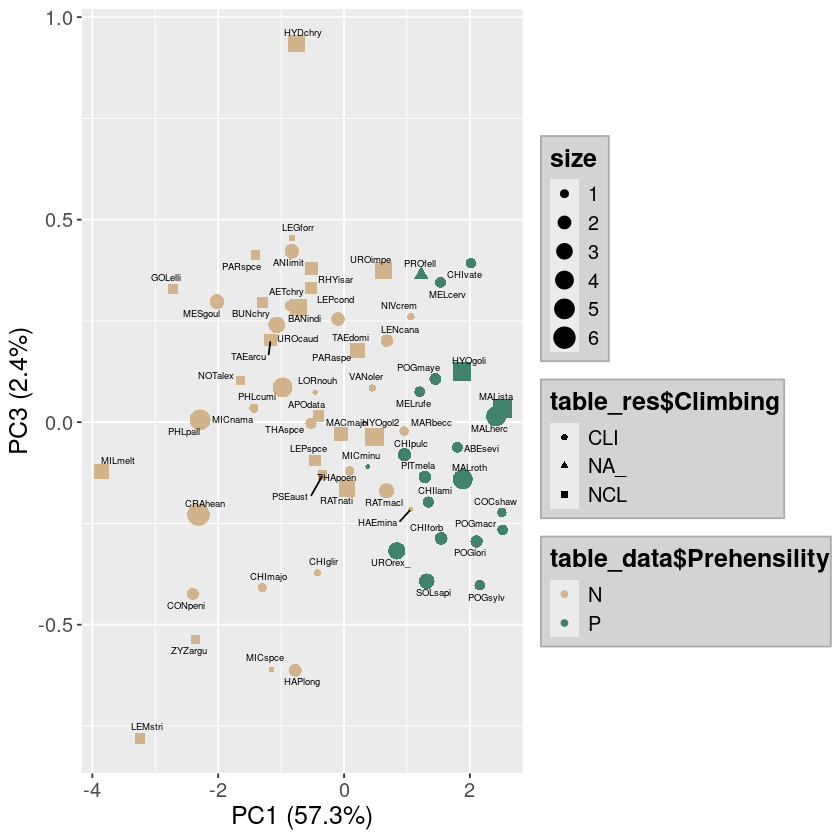

In [15]:
PC_distal12
PC_distal13

### Last Quarter

In [16]:
DF_PCA_last_Q <- table_res[,c(6, 7, 12, 17)]
rownames(DF_PCA_last_Q) <- table_res$Genus_species
PCA_last_Q <- PCA(DF_PCA_last_Q)
fviz_pca_var(PCA_last_Q, axes = c(1, 2), label="last_Q")
fviz_pca_ind(PCA_last_Q, axes = c(1, 2), label="last_Q", habillage=as.factor(table_res$Prehensility), addEllipses = TRUE)

In [17]:
dataset_last_Q <-data.frame(size=table_data$Proxy_size_GM, PC1=PCA_last_Q$ind$coord[,1],PC2=PCA_last_Q$ind$coord[,2],PC3=PCA_last_Q$ind$coord[,3])
size<-dataset_last_Q$size
cores<-c("#D2B48C","#40826D")
PC_last_Q12 <- ggplot(dataset_last_Q) + geom_point(aes(x=PC1,y=PC2,color=table_data$Prehensility,size=size,shape=table_res$Climbing)) + scale_color_manual(values=cores,aesthetics = c("colour","fill")) + theme(text = element_text(size=15), legend.title = element_text(colour="black", size=15, face = "bold"),legend.background = element_rect(fill="lightgray",size=0.5, linetype = "solid", colour = "darkgray")) + scale_x_continuous(name = paste("PC1 (", round(PCA(DF_PCA_last_Q)$eig[1,2], 1), "%)", sep = "")) + scale_y_continuous(name = paste("PC2 (", round(PCA(DF_PCA_last_Q)$eig[2,2], 1), "%)", sep = "")) + geom_text_repel(aes(x=PC1,y=PC2,label=table_res$Nomenclature),size=2)
PC_last_Q13 <- ggplot(dataset_last_Q) + geom_point(aes(x=PC1,y=PC3,color=table_data$Prehensility,size=size,shape=table_res$Climbing))  + scale_color_manual(values=cores,aesthetics = c("colour","fill")) + theme(text = element_text(size=15), legend.title = element_text(colour="black", size=15, face = "bold"),legend.background = element_rect(fill="lightgray",size=0.5, linetype = "solid", colour = "darkgray")) + scale_x_continuous(name = paste("PC1 (", round(PCA(DF_PCA_last_Q)$eig[1,2], 1), "%)", sep = "")) + scale_y_continuous(name = paste("PC3 (", round(PCA(DF_PCA_last_Q)$eig[3,2], 1), "%)", sep = "")) + geom_text_repel(aes(x=PC1,y=PC3,label=table_res$Nomenclature),size=2)

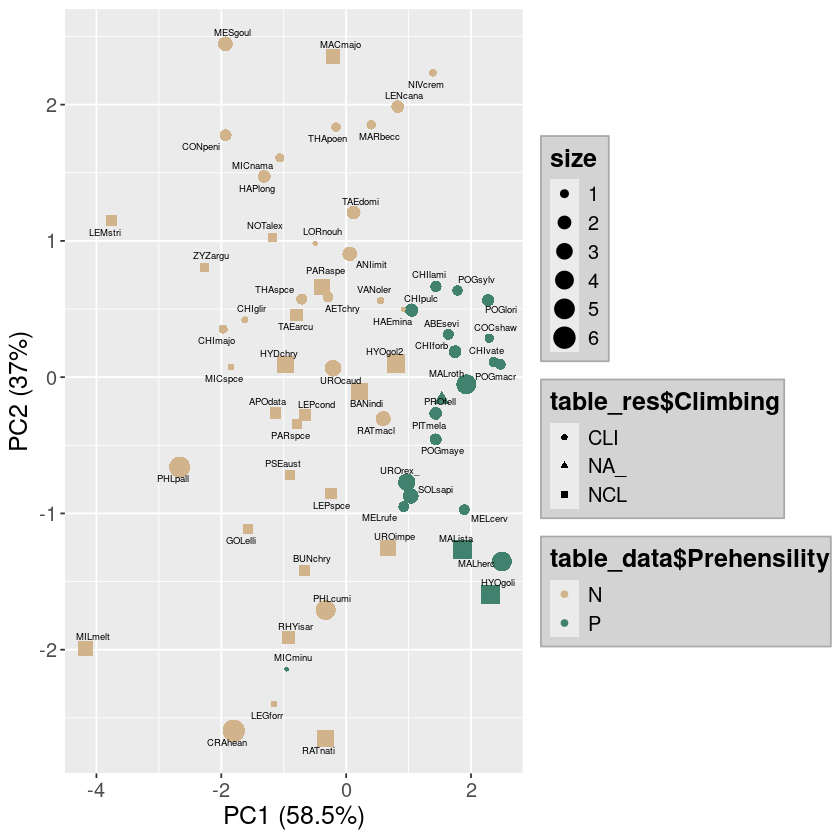

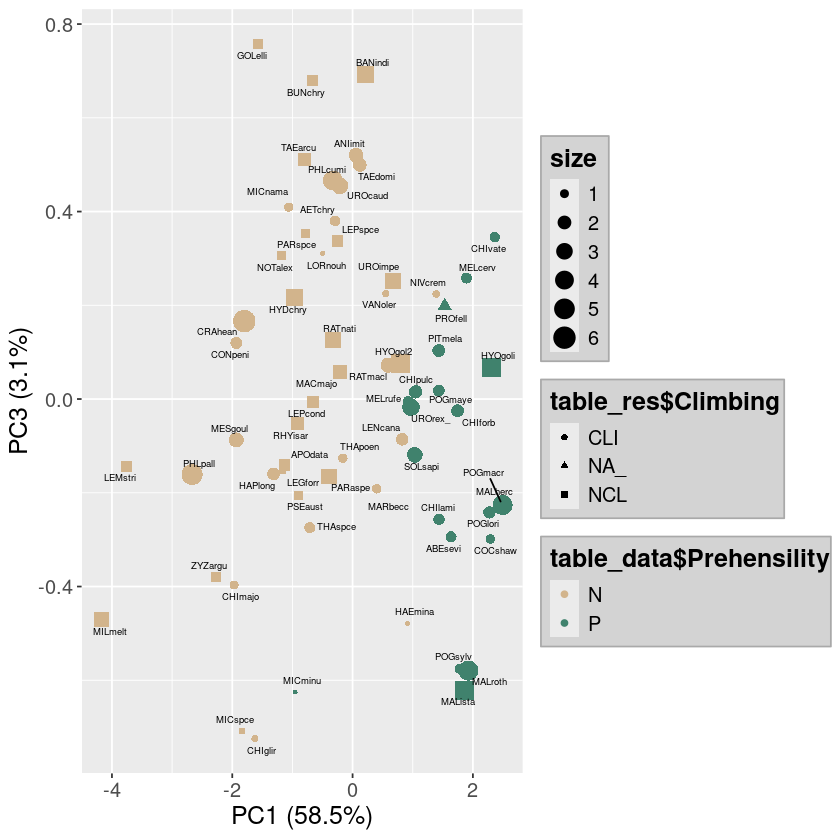

In [18]:
PC_last_Q12
PC_last_Q13

## Linear Discriminant analysis

### Training group creation

In [19]:
training_group <- c("Thamnomys_poensis","Hyomys_goliath","Hyomys_goliath_2","Mallomys_hercules","Mallomys_istapantap","Mallomys_rothschildi","Protochromys_fellowsi","Uromys_imperator","Uromys_rex")

### All Vertebrae

### Data preparation

In [20]:
test.data_all <- DF_PCA_all[training_group,]
codeprehLDAphylo <- as.factor(table_data$Prehensility)
names(codeprehLDAphylo) = table_data$Genus_species
codeprehLDAphylo_training <- codeprehLDAphylo[names(codeprehLDAphylo) %in% setdiff(names(codeprehLDAphylo), training_group)]
training.data_all <- DF_PCA_all[rownames(DF_PCA_all) %in% names(codeprehLDAphylo[names(codeprehLDAphylo) %in% setdiff(names(codeprehLDAphylo), training_group)]),]

### LDA

In [21]:
model_all <- lda(training.data_all, codeprehLDAphylo_training)
predictions_all <- model_all %>% predict(test.data_all)

### Distal Vertebrae

### Data preparation

In [22]:
test.data_distal <- DF_PCA_distal[training_group,]
codeprehLDAphylo <- as.factor(table_data$Prehensility)
names(codeprehLDAphylo) = table_data$Genus_species
codeprehLDAphylo_training <- codeprehLDAphylo[names(codeprehLDAphylo) %in% setdiff(names(codeprehLDAphylo), training_group)]
training.data_distal <- DF_PCA_distal[rownames(DF_PCA_distal) %in% names(codeprehLDAphylo[names(codeprehLDAphylo) %in% setdiff(names(codeprehLDAphylo), training_group)]),]

### LDA

In [23]:
model_distal <- lda(training.data_distal, codeprehLDAphylo_training)
predictions_distal <- model_distal %>% predict(test.data_distal)

### Last Quarter

### Data preparation

In [24]:
test.data_last_Q <- DF_PCA_last_Q[training_group,]
codeprehLDAphylo <- as.factor(table_data$Prehensility)
names(codeprehLDAphylo) = table_data$Genus_species
codeprehLDAphylo_training <- codeprehLDAphylo[names(codeprehLDAphylo) %in% setdiff(names(codeprehLDAphylo), training_group)]
training.data_last_Q <- DF_PCA_last_Q[rownames(DF_PCA_last_Q) %in% names(codeprehLDAphylo[names(codeprehLDAphylo) %in% setdiff(names(codeprehLDAphylo), training_group)]),]

### LDA

In [25]:
model_last_Q <- lda(training.data_last_Q, codeprehLDAphylo_training)
predictions_last_Q <- model_last_Q %>% predict(test.data_last_Q)

### Save estimated Prehensility type

#### Assuming a threshold at 70 %

In [26]:
predictions_last_Q_posterior <- as.data.frame(predictions_last_Q$posterior)
Prehensility_LDA <- table_data$Prehensility
for(j in 1:nrow(predictions_last_Q_posterior)){
    if(predictions_last_Q_posterior[j,1] > 0.7){
        Prehensility_LDA[which(table_data$Genus_species == rownames(predictions_last_Q_posterior)[j])] <- "N"
    }
    if(predictions_last_Q_posterior[j,2] > 0.7){
        Prehensility_LDA[which(table_data$Genus_species == rownames(predictions_last_Q_posterior)[j])] <- "P"
    }
    if(predictions_last_Q_posterior[j,1] < 0.7 & predictions_last_Q_posterior[j,2] < 0.7){
        Prehensility_LDA[which(table_data$Genus_species == rownames(predictions_last_Q_posterior)[j])] <- NA
    }
}

In [27]:
df_prehensility_ASE<-as.data.frame(cbind(table_data$Genus_species, Prehensility_LDA))

In [28]:
write.table(df_prehensility_ASE, "data/Code_P_Muridae.tsv", sep="\t", col.names = TRUE, row.names = FALSE)

In [29]:
write.table(as.data.frame(cbind(table_data, Prehensility_LDA)), "data/table_complete_LDA.tsv", sep="\t", col.names = TRUE, row.names = FALSE)

## Phylomorphospace & Phenogram

### Pre-painting the clades

In [30]:
Prehensility_LDA <- as.character(df_prehensility_ASE$Prehensility_LDA)
Prehensility_LDA[which(is.na(Prehensility_LDA))] <- "UKN"
Prehensility_LDA <- as.factor(Prehensility_LDA)
names(Prehensility_LDA) <- table_data$Genus_species
colspheno<-setNames(c("#D2B48C","#40826D","#000000"), sort(unique(Prehensility_LDA)))
painted<-paintSubTree(phy,128,"PHL","0")
painted<-paintSubTree(painted,111,"MIC+RAT")
painted<-paintSubTree(painted,120,"VAN+MIL+PIT+ARV")
painted<-paintSubTree(painted,110,"CHI")
painted<-paintSubTree(painted,71,"HYD") 
paintedSC <- painted
coltree <- c("0"="black", "PHL"="#999999","MIC+RAT"="#D55E00", "VAN+MIL+PIT+ARV"="#0072B2", "CHI"="#56B4E9" ,"HYD"="#CC79A7")
cols<-c(rep("black",length(phy$tip.label)), rep("black", phy$Nnode))
names(cols)<-1:length(cols)
cols[df_prehensility_ASE$Prehensility_LDA=="N"]<-"#D2B48C"
cols[df_prehensility_ASE$Prehensility_LDA=="P"]<-"#40826D"

#### Phylomorphospace

#### All vertebrae

In [31]:
tabphymor_all <- PCA_all$ind$coord[,1:3]
DFphymor_all <- data.frame(tabphymor_all,df_prehensility_ASE$Prehensility_LDA)
rownames(DFphymor_all) <- table_data$Genus_species

##### Plot

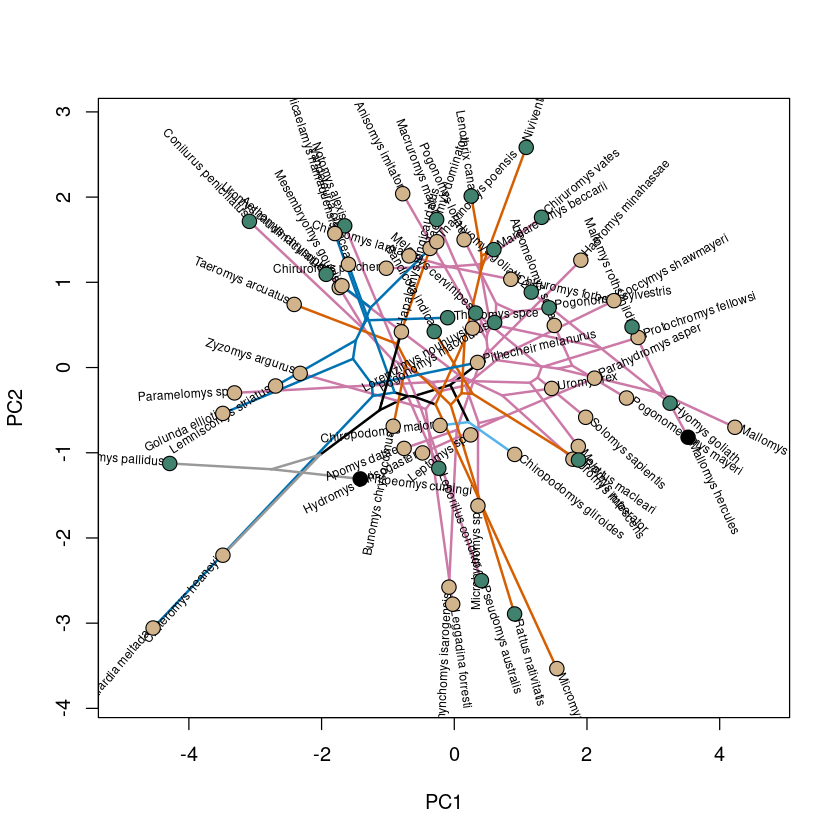

In [32]:
phylmorph_all_12 <- phylomorphospace(paintedSC,DFphymor_all[,1:2],xlab="PC1",ylab="PC2", colors= coltree, control = list(col.node= cols), fsize=0.8, node.size=0)
points(DFphymor_all[,1:2][paintedSC$tip.label,],col="black", bg=cols ,pch=21,cex=1.6, lwd=0.9)

### Distal vertebrae

In [33]:
tabphymor_distal <- PCA_distal$ind$coord[,1:3]
DFphymor_distal <- data.frame(tabphymor_distal,df_prehensility_ASE$Prehensility_LDA)
rownames(DFphymor_distal) <- table_data$Genus_species

##### Plot

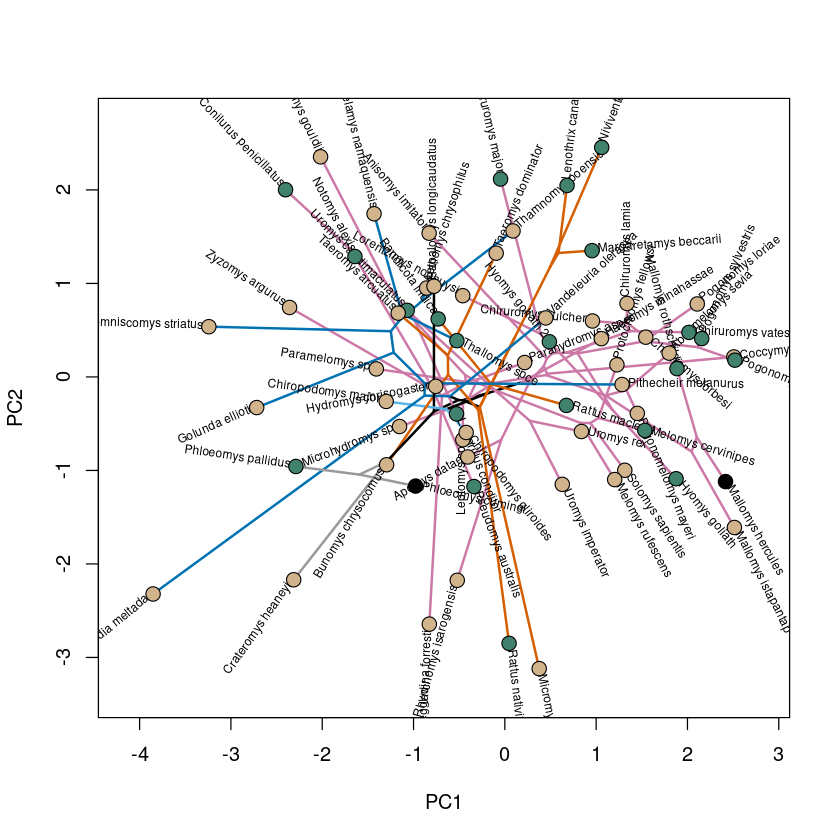

In [34]:
phylmorph_distal_12 <- phylomorphospace(paintedSC,DFphymor_distal[,1:2],xlab="PC1",ylab="PC2", colors= coltree, control = list(col.node= cols), fsize=0.8, node.size=0)
points(DFphymor_distal[,1:2][paintedSC$tip.label,],col="black", bg=cols ,pch=21,cex=1.6, lwd=0.9)

### Last Quarter vertebrae

In [35]:
tabphymor_last_Q <- PCA_last_Q$ind$coord[,1:3]
DFphymor_last_Q <- data.frame(tabphymor_last_Q,df_prehensility_ASE$Prehensility_LDA)
rownames(DFphymor_last_Q) <- table_data$Genus_species

##### Plot

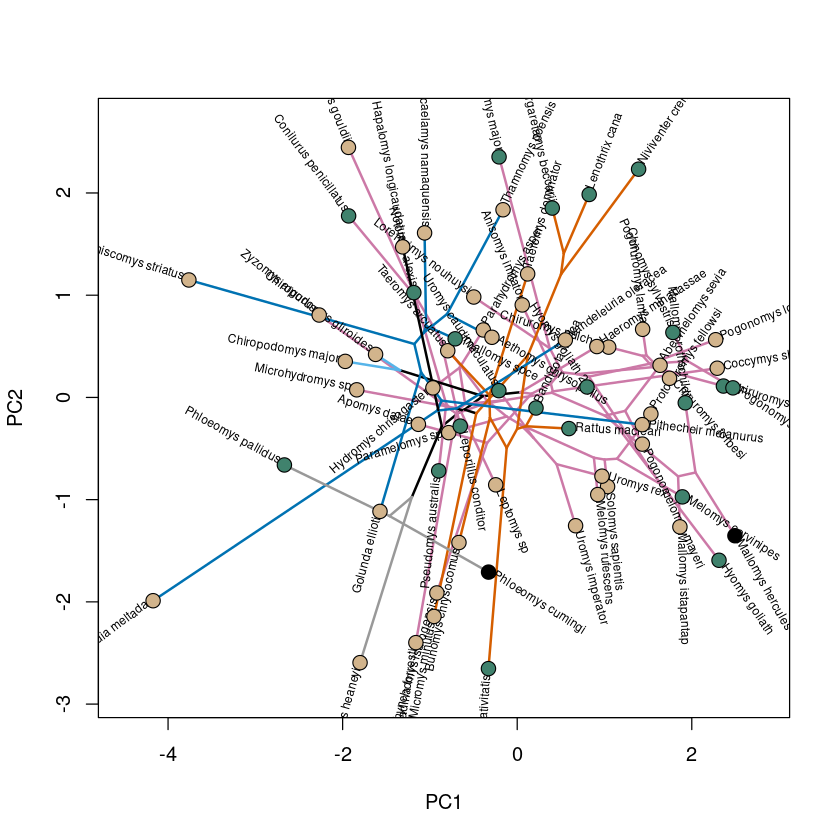

In [36]:
phylmorph_last_Q_12 <- phylomorphospace(paintedSC,DFphymor_last_Q[,1:2],xlab="PC1",ylab="PC2", colors= coltree, control = list(col.node= cols), fsize=0.8, node.size=0)
points(DFphymor_last_Q[,1:2][paintedSC$tip.label,],col="black", bg=cols ,pch=21,cex=1.6, lwd=0.9)

##### Plot All (PC1)

Optimizing the positions of the tip labels...


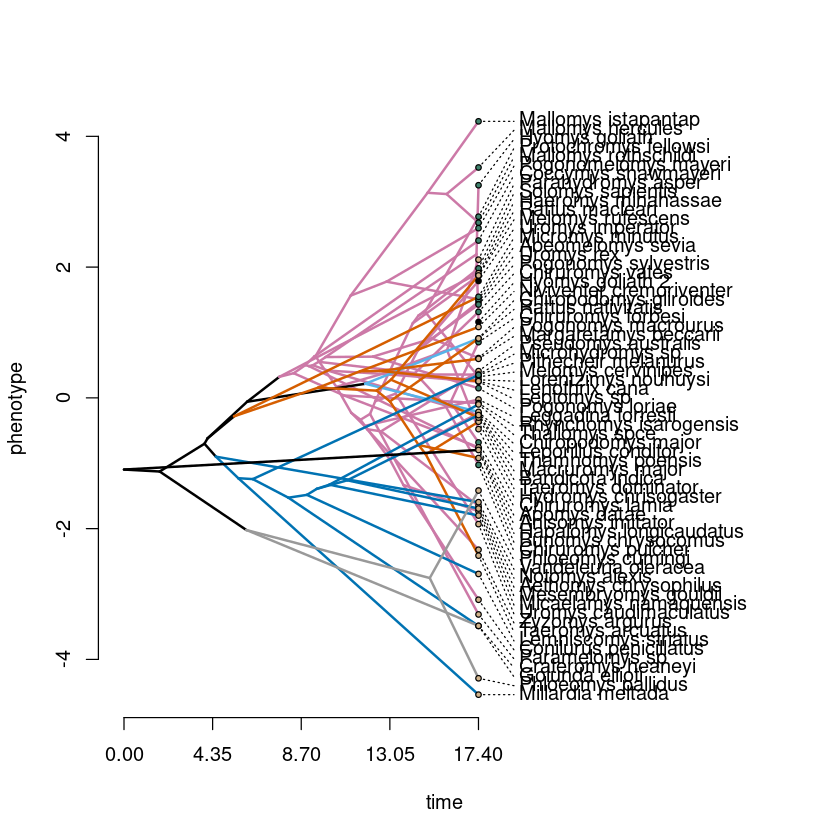

In [37]:
phenogram(painted,PCA_all$ind$coord[,1], colors = coltree,spread.labels=TRUE,spread.cost=c(1,0))
tiplabels(pie=to.matrix(Prehensility_LDA[painted$tip.label],seq=sort(unique(Prehensility_LDA))),
          piecol=colspheno,cex=0.2)

##### Plot All (PC2)

Optimizing the positions of the tip labels...


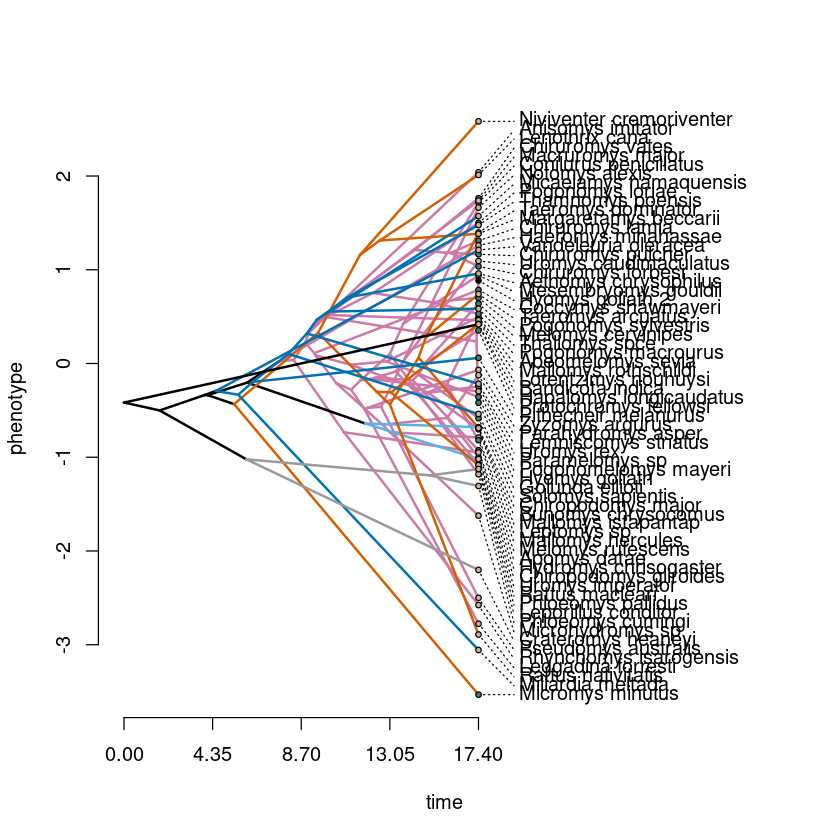

In [38]:
phenogram(painted,PCA_all$ind$coord[,2], colors = coltree,spread.labels=TRUE,spread.cost=c(1,0))
tiplabels(pie=to.matrix(Prehensility_LDA[painted$tip.label],seq=sort(unique(Prehensility_LDA))),
          piecol=colspheno,cex=0.2)

##### Plot All (PC3)

Optimizing the positions of the tip labels...


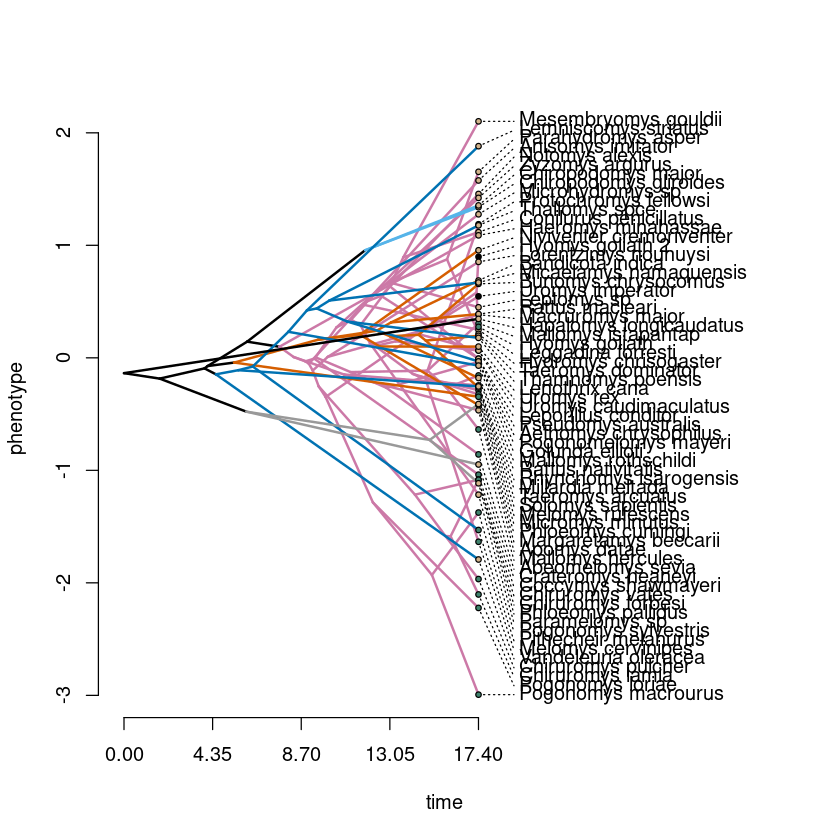

In [39]:
phenogram(painted,PCA_all$ind$coord[,3], colors = coltree,spread.labels=TRUE,spread.cost=c(1,0))
tiplabels(pie=to.matrix(Prehensility_LDA[painted$tip.label],seq=sort(unique(Prehensility_LDA))),
          piecol=colspheno,cex=0.2)

#### Plot Distal (PC1)

Optimizing the positions of the tip labels...


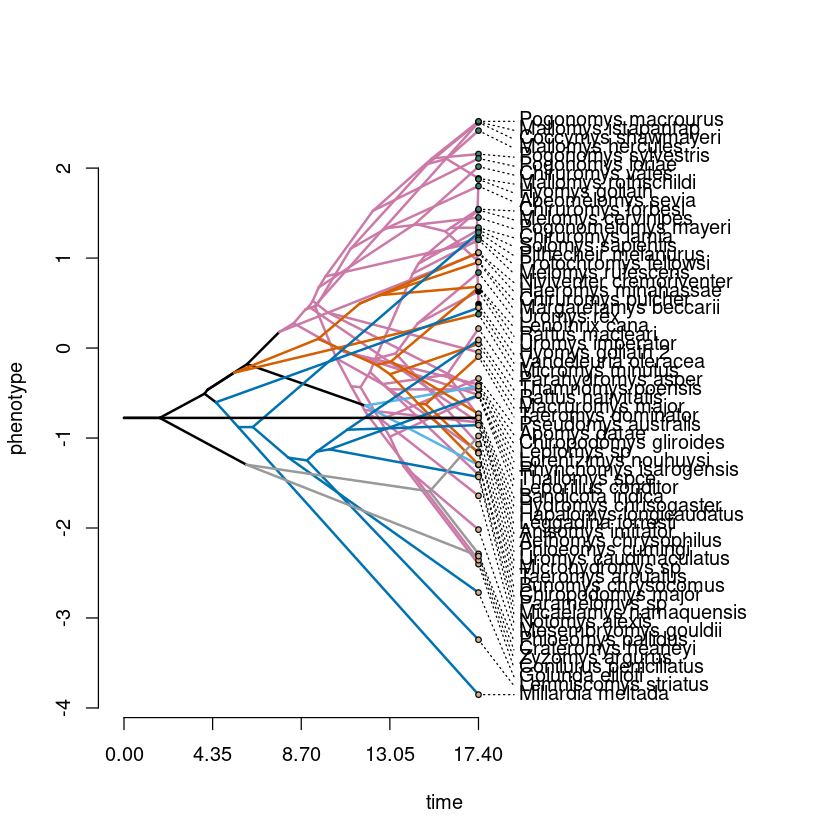

In [40]:
phenogram(painted,PCA_distal$ind$coord[,1], colors = coltree,spread.labels=TRUE,spread.cost=c(1,0))
tiplabels(pie=to.matrix(Prehensility_LDA[painted$tip.label],seq=sort(unique(Prehensility_LDA))),
          piecol=colspheno,cex=0.2)

#### Plot Last Quarter (PC1)

Optimizing the positions of the tip labels...


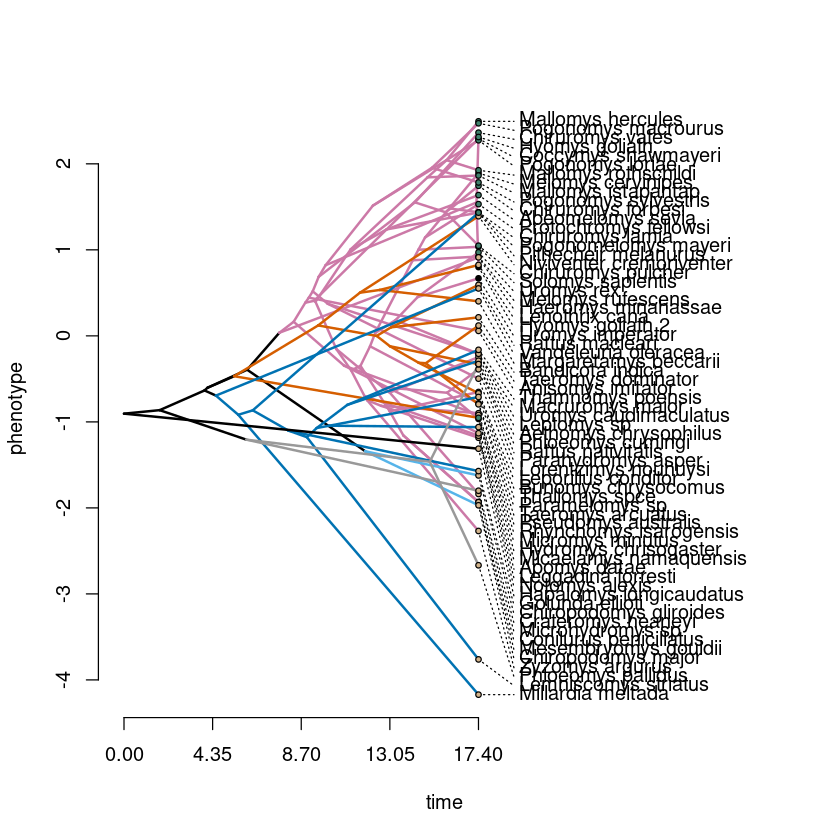

In [41]:
phenogram(painted,PCA_last_Q$ind$coord[,1], colors = coltree,spread.labels=TRUE,spread.cost=c(1,0))
tiplabels(pie=to.matrix(Prehensility_LDA[painted$tip.label],seq=sort(unique(Prehensility_LDA))),
          piecol=colspheno,cex=0.2)

## Convergence Index

## Data Preparation

In [42]:
ScoresPC1 <- cbind(PCA_all$ind$coord[,1],PCA_distal$ind$coord[,1],PCA_last_Q$ind$coord[,1])
colnames(ScoresPC1) <- cbind("PC1_all","PC1_distal","PC1_last_Q")
scoresPC1_match <- ScoresPC1[match(phy$tip.label,rownames(ScoresPC1)),]
list_preh <- as.character(table_data$Genus_species[Prehensility_LDA == "P"])

data_convSig_all <- as.matrix(scoresPC1_match[,1])
data_convSig_distal <- as.matrix(scoresPC1_match[,2])
data_convSig_last_Q <- as.matrix(scoresPC1_match[,3])

### Convergence index model

#### All Vertebrae

##### PCI 

In [43]:
calcConv(phy, scoresPC1_match[,1], list_preh, VERBOSE = FALSE)
resConv_all_PCI <- convSig(phy, data_convSig_all, list_preh, nsim = 1000)
saveRDS(resConv_all_PCI, "data/resConv_all_PCI.rds")

C1          C2          C3          C4 
0.407741831 1.040602656 0.220283793 0.003882744

##### All axes

In [44]:
mat_PCA_all <- data.matrix(DF_PCA_all)
calcConv(phy, mat_PCA_all, list_preh, VERBOSE = FALSE)
resConv_all <- convSig(phy, mat_PCA_all, list_preh, nsim = 1000)
saveRDS(resConv_all, "data/resConv_all.rds")

C1         C2         C3         C4 
0.42984460 2.96765435 0.24986575 0.01112617

#### Distal Vertebrae

##### PCI 

In [45]:
calcConv(phy, scoresPC1_match[,2], list_preh, VERBOSE = FALSE)
resConv_distalPCI <- convSig(phy, data_convSig_distal, list_preh, nsim = 1000)
saveRDS(resConv_distalPCI, "data/resConv_distalPCI.rds")

C1         C2         C3         C4 
0.63790718 1.28346159 0.35587309 0.01758153

##### All axes

In [46]:
mat_PCA_distal <- data.matrix(DF_PCA_distal)
calcConv(phy, mat_PCA_distal, list_preh, VERBOSE = FALSE)
resConv_distal <- convSig(phy, mat_PCA_distal, list_preh, nsim = 1000)
saveRDS(resConv_distal, "data/resConv_distal.rds")

C1         C2         C3         C4 
0.43524221 2.99145785 0.25371810 0.01199306

#### Last Quarter Vertebrae

##### PCI 

In [47]:
calcConv(phy, scoresPC1_match[,3], list_preh, VERBOSE = FALSE)
resConv_last_QPCI <- convSig(phy, data_convSig_last_Q, list_preh, nsim = 1000)
saveRDS(resConv_last_QPCI, "data/resConv_last_QPCI.rds")

C1         C2         C3         C4 
0.60042553 1.23116414 0.32839744 0.01673611

##### All axes

In [48]:
mat_PCA_last_Q <- data.matrix(DF_PCA_last_Q) 
calcConv(phy, mat_PCA_last_Q, list_preh, VERBOSE = FALSE)
resConv_last_Q <- convSig(phy, mat_PCA_last_Q, list_preh, nsim = 1000)
saveRDS(resConv_last_Q, "data/resConv_last_Q.rds")

C1        C2        C3        C4 
0.4310240 2.9846253 0.2492562 0.0110469

### Optional (Convergence index on posterior tree distribution)

In [49]:
for (i in 201:300){
    
phy<-multi_phy[[i]]

phy$tip.label<-paste(str_split_fixed(phy$tip.label, "_", 3)[,1], str_split_fixed(phy$tip.label, "_", 3)[,2], sep ="_")
phy<-AddTip(phy, where = which(phy$tip.label== "Hyomys_goliath"), label = "Hyomys_goliath_2", edgeLength = 0.1, lengthBelow = 0.1)
phy$tip.label[phy$tip.label=='Taeromys_punicans']<-'Taeromys_arcuatus'
phy$tip.label[phy$tip.label=='Lenothrix_canus']<-'Lenothrix_cana'
phy$tip.label[phy$tip.label=='Hydromys_obi']<-'Hydromys_chrisogaster'
phy$tip.label[phy$tip.label=='Leptomys_elegans']<-'Leptomys_sp'
phy$tip.label[phy$tip.label=='Microhydromys_richardsoni']<-'Microhydromys_sp'
phy$tip.label[phy$tip.label=='Mesembriomys_gouldii']<-'Mesembryomys_gouldii'
phy$tip.label[phy$tip.label=='Paramelomys_levipes']<-'Paramelomys_sp'
phy$tip.label[phy$tip.label=='Haeromys_minahassaeZ23000']<-'Haeromys_minahassae'
phy$tip.label[phy$tip.label=='Thallomys_sp']<-'Thallomys_spce'
phy$tip.label[phy$tip.label=='Pithecheir_chim']<-'Pithecheir_melanurus'


calcConv(phy, scoresPC1_match[,1], list_preh, VERBOSE = FALSE)
resConv_all_PCI <- convSig(phy, data_convSig_all, list_preh, nsim = 1000)
saveRDS(resConv_all_PCI, paste("conv_Index/resConv_allPCI_replicate_", i, ".rds", sep = ""))

##### All axes

mat_PCA_all <- data.matrix(DF_PCA_all)
calcConv(phy, mat_PCA_all, list_preh, VERBOSE = FALSE)
resConv_all <- convSig(phy, mat_PCA_all, list_preh, nsim = 1000)
saveRDS(resConv_all, paste("conv_Index/resConv_all_replicate_", i, ".rds", sep = ""))

#### Distal Vertebrae

##### PCI 

calcConv(phy, scoresPC1_match[,2], list_preh, VERBOSE = FALSE)
resConv_distalPCI <- convSig(phy, data_convSig_distal, list_preh, nsim = 1000)
saveRDS(resConv_distalPCI, paste("conv_Index/resConv_distalPCI_replicate_", i, ".rds", sep = ""))

##### All axes

mat_PCA_distal <- data.matrix(DF_PCA_distal)
calcConv(phy, mat_PCA_distal, list_preh, VERBOSE = FALSE)
resConv_distal <- convSig(phy, mat_PCA_distal, list_preh, nsim = 1000)
saveRDS(resConv_distal, paste("conv_Index/resConv_all_replicate_", i, ".rds", sep = ""))

#### Last Quarter Vertebrae

##### PCI 

calcConv(phy, scoresPC1_match[,3], list_preh, VERBOSE = FALSE)
resConv_last_QPCI <- convSig(phy, data_convSig_last_Q, list_preh, nsim = 1000)
saveRDS(resConv_last_QPCI, paste("conv_Index/resConv_last_Q_PCI_replicate_", i, ".rds", sep = ""))

##### All axes

mat_PCA_last_Q <- data.matrix(DF_PCA_last_Q) 
calcConv(phy, mat_PCA_last_Q, list_preh, VERBOSE = FALSE)
resConv_last_Q <- convSig(phy, mat_PCA_last_Q, list_preh, nsim = 1000)
saveRDS(resConv_last_Q, paste("conv_Index/resConv_last_Q_replicate_", i, ".rds", sep = ""))
}